# Лабораторная работа 5

Решение задачи регрессии

In [ ]:
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=["hour", "requests"]).dropna()

target_var_name = 'requests'

hours_data = data['hour']
requests_data = data[target_var_name]

import numpy as np
from numpy import isnan

requests_data.head()

0    2272.0
2    1386.0
3    1365.0
4    1488.0
5    1337.0
Name: requests, dtype: float64

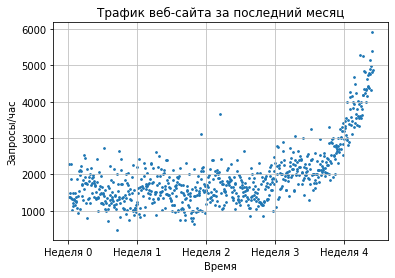

In [ ]:
plt.scatter(hours_data, requests_data, s=3)
plt.title('Трафик веб-сайта за последний месяц')

plt.xlabel('Время')
plt.ylabel('Запросы/час')

plt.xticks([w*7*24 for w in range(10)], ['Неделя %i' %w for w in range(10)])
plt.autoscale(tight=False)

plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [ ]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

# рефакторинг этой функции: найти в документации
# как вычисляется MSE с помощью scipy
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# два предположения по поводу тренда:

# 1 - один линейный или квадратичный тренд
# 2 - не один тренд, а два - линейных или один линейный, а второй - квадратичный
# где-то по границе 3.5 недели

f1p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print("Параметры модели {}".format(f1p))

Параметры модели [  2.59619213 989.02487106]


In [ ]:
f1 = np.poly1d(f1p)
print(f"{error(f1, hours_data, requests_data):.5}")
print(f"{mean_squared_error(list(map(f1, hours_data)), requests_data):.5}")

3.1739e+08
4.3182e+05


Таким образом, наша модель будет выглядеть следующим образом:
```
f(x) = 2.59619213 * x + 989.02487106
```
MSE: `3.1739e+08`

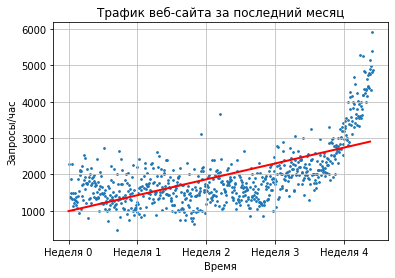

In [ ]:
plt.scatter(hours_data, requests_data, s=3)

plt.title('Трафик веб-сайта за последний месяц')

plt.xlabel('Время')
plt.ylabel('Запросы/час')

plt.xticks([w*7*24 for w in range(10)], ['Неделя %i' %w for w in range(10)])
plt.autoscale(tight=False)

plt.grid(True, linestyle='-', color='0.75')


# отобразим модель #1
len_h = len(hours_data)
f1x = np.linspace(0, hours_data[len_h], len_h)
f1y = f1(f1x)
plt.plot(f1x, f1y, linewidth=2.0, color='r')


plt.show()

## Самостоятельная работа

1. Реализовать модели степени полинома 2, 3, 5, 10, 20
2. Посчитать для каждой из них метрику ошибки MSE и дать характеристику (какая меньше, какая больше)
3. Визуализировать каждую модель на одном графике

In [ ]:
 # полином 2
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
f2 = np.poly1d(f2p)

print(f"{error(f2, hours_data, requests_data):.5}")
print("Параметры модели {}".format(f2p))

1.7998e+08
Параметры модели [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [ ]:
# полином 3
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
f3 = np.poly1d(f3p)

print(f"{error(f3, hours_data, requests_data):.5}")
print("Параметры модели {}".format(f3p))

1.3935e+08
Параметры модели [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]


In [ ]:
# полином 5
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
f5 = np.poly1d(f5p)

print(f"{error(f5, hours_data, requests_data):.5}")
print("Параметры модели {}".format(f5p))

1.2446e+08
Параметры модели [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]


In [ ]:
# полином 10
f10p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
f10 = np.poly1d(f10p)

print(f"{error(f10, hours_data, requests_data):.5}")
print("Параметры модели {}".format(f10p))

1.2194e+08
Параметры модели [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]


In [ ]:
# полином 20
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
f20 = np.poly1d(f20p)

print(f"{error(f20, hours_data, requests_data):.5}")
print("Параметры модели {}".format(f20p))

1.1053e+08
Параметры модели [ 4.83090666e-47 -3.18254288e-43  8.87216773e-40 -1.31484635e-36
  9.87793047e-34 -8.55503070e-32 -5.09644269e-28  3.80311873e-25
  4.98732305e-23 -2.74831025e-19  2.35473549e-16 -1.17298303e-13
  3.93132320e-11 -9.23453278e-09  1.52942330e-06 -1.76098283e-04
  1.36396780e-02 -6.69561733e-01  1.86541701e+01 -2.35174285e+02
  2.33820200e+03]


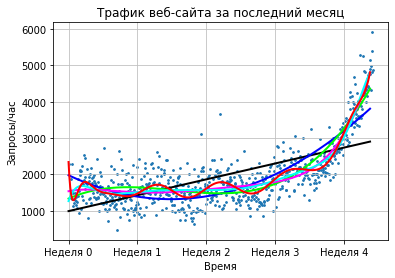

In [ ]:
plt.scatter(hours_data, requests_data, s=3)

plt.title('Трафик веб-сайта за последний месяц')

plt.xlabel('Время')
plt.ylabel('Запросы/час')

plt.xticks([w*7*24 for w in range(10)], ['Неделя %i' %w for w in range(10)])
plt.autoscale(tight=False)

plt.grid(True, linestyle='-', color='0.75')


# отобразим модель #1
len_h = len(hours_data)
f1x = np.linspace(0, hours_data[len_h], len_h)
f1y = f1(f1x)
plt.plot(f1x, f1y, linewidth=2.0, color='black')

# отобразим модель #2
f2y = f2(f1x)
plt.plot(f1x, f2y, linewidth=2.0, color='blue')

# отобразим модель #3
f3y = f3(f1x)
plt.plot(f1x, f3y, linewidth=2.0, color='lime')

# отобразим модель #5
f5y = f5(f1x)
plt.plot(f1x, f5y, linewidth=2.0, color='magenta')

# отобразим модель #10
f10y = f10(f1x)
plt.plot(f1x, f10y, linewidth=2.0, color='cyan')

# отобразим модель #20
f20y = f20(f1x)
plt.plot(f1x, f20y, linewidth=2.0, color='red')

plt.show()

In [ ]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)

hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:], requests_data[divider:]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]

In [ ]:
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 3, full=True)
f3 = np.poly1d(f3p)

print(f"MSE (для данных ДО 3.5 недели) = {error(f3, hours_data_1, requests_data_1):.5}")
print(f"MSE (только данных с 3.5 недели) = {error(f3, hours_data_2, requests_data_2):.5}")

MSE (для данных ДО 3.5 недели) = 1.0159e+08
MSE (только данных с 3.5 недели) = 8.4713e+07


In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
f20 = np.poly1d(f20p)

print(f"MSE (для данных ДО 3.5 недели) = {error(f20, hours_data_1, requests_data_1):.5}")
print(f"MSE (только данных с 3.5 недели) = {error(f20, hours_data_2, requests_data_2):.5}")

MSE (для данных ДО 3.5 недели) = 9.1187e+07
MSE (только данных с 3.5 недели) = 1.934e+07


In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f20, hours_data_test, requests_data_test):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f20, hours_data_2, requests_data_2):.5}")

MSE (для данных c 3.5 недели по 4.1 недели)= 7.8668e+06
MSE (только для данных с 3.5 недели)= 1.876e+07


# Ответить на вопрос

Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (от 0 недели до 3.5 недели и с 3.5 недели до конца), подходит наилучшим образом?
Модель, в данном случае, это степень полинома. 
Мы уже знаем (см. ячейку выше), что степень полинома 20 плохо подходит для тестовых данных (hours_data_test и requests_data_test) потому что ошибка для тестовых данных на 9 порядков выше, чем ошибка для тренировочного набора данных.

# Решение
Протестируем модели степени полинома 1, 2, 3, 4, 5, 10, 20

In [ ]:
degrees = [1, 2, 3, 4, 5, 10, 20]

for i in degrees:
    fip, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, i, full=True)
    fi = np.poly1d(fip)

    before_data = error(fi, hours_data_1, requests_data_1)
    after_data = error(fi, hours_data_2, requests_data_2)

    print(f"Степень: {i}")
    print(f"MSE (для данных ДО 3.5 недели) = {before_data:.5}")
    print(f"MSE (только данных с 3.5 недели) = {after_data:.5}")
    print(f"Разница MSE: {(after_data - before_data):.5}\n")

Степень: 1
MSE (для данных ДО 3.5 недели) = 1.1081e+08
MSE (только данных с 3.5 недели) = 3.551e+08
Разница MSE: 2.4429e+08

Степень: 2
MSE (для данных ДО 3.5 недели) = 1.0282e+08
MSE (только данных с 3.5 недели) = 1.8116e+08
Разница MSE: 7.8346e+07

Степень: 3
MSE (для данных ДО 3.5 недели) = 1.0159e+08
MSE (только данных с 3.5 недели) = 8.4713e+07
Разница MSE: -1.6873e+07

Степень: 4
MSE (для данных ДО 3.5 недели) = 1.0117e+08
MSE (только данных с 3.5 недели) = 3.1047e+07
Разница MSE: -7.0123e+07

Степень: 5
MSE (для данных ДО 3.5 недели) = 1.0116e+08
MSE (только данных с 3.5 недели) = 4.1021e+07
Разница MSE: -6.014e+07

Степень: 10
MSE (для данных ДО 3.5 недели) = 9.3236e+07
MSE (только данных с 3.5 недели) = 2.1939e+13
Разница MSE: 2.1939e+13

Степень: 20
MSE (для данных ДО 3.5 недели) = 9.0578e+07
MSE (только данных с 3.5 недели) = 2.4825e+17
Разница MSE: 2.4825e+17



Вывод: лучше всего подойдёт 4 степень, так как ошибка у тестовых данных намного меньше чем у входных данных. Среди всех степеней разница ошибок здесь наиболее подходящая